In [1]:
import io
import glob
import numpy as np
import pandas as pd

import dateutil.tz as tz

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:
glued_data = pd.DataFrame()

for file_name in glob.glob(f'/Users/apple/Desktop/Others/Python_Codes/Cirrus_Paper/01_prep_od_csv/*hsrl_ods_cirrus_only.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    #print(x)
    glued_data = pd.concat([glued_data,x],axis=0)

    
df = glued_data
df

,Unnamed: 0,Unnamed: 0.1,od_mean,cld_top,cld_bot,cld_num,ts,minute,hour,day,...,index,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time,season,Period,low_cld
0,11,11,0.033229,5321.0,4872.0,0.0,17,56,0,1,...,2019-01-01 08:56:00+08:00,58.462084,58.489083,31.537916,31.510917,129.383737,-3.214366,DJF,Day,NaN
1,17,17,1.086081,5171.0,4572.0,0.0,17,26,1,1,...,2019-01-01 09:26:00+08:00,53.068281,53.090365,36.931719,36.909635,134.583166,-3.224270,DJF,Day,NaN
2,24,24,0.986202,3223.0,2473.0,0.0,17,1,2,1,...,2019-01-01 10:01:00+08:00,47.431830,47.449924,42.568170,42.550076,142.060591,-3.235821,DJF,Day,NaN
3,52,52,0.257284,14615.0,13566.0,0.0,17,21,4,1,...,2019-01-01 12:21:00+08:00,38.032857,38.045869,51.967143,51.954131,188.238592,-3.281999,DJF,Day,NaN
4,69,69,0.190486,2473.0,1424.0,0.0,17,46,5,1,...,2019-01-01 13:46:00+08:00,45.846056,45.863178,44.153944,44.136822,215.255112,-3.310014,DJF,Day,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47237,172802,172,0.274365,2024.0,375.0,0.0,15,11,21,30,...,2020-12-01 05:11:00+08:00,103.022481,103.022481,-13.022481,-13.022481,109.502501,11.050006,SON,Night,N
47238,172806,176,0.249744,1124.0,375.0,0.0,15,31,21,30,...,2020-12-01 05:31:00+08:00,98.477266,98.477266,-8.477266,-8.477266,110.454626,11.044844,SON,Night,N
47239,172807,177,0.271895,1874.0,375.0,0.0,15,36,21,30,...,2020-12-01 05:36:00+08:00,97.345449,97.345449,-7.345449,-7.345449,110.711878,11.043553,SON,Night,N
47240,172823,193,0.339973,974.0,375.0,0.0,15,56,22,30,...,2020-12-01 06:56:00+08:00,79.483117,79.568462,10.516883,10.431538,116.029993,11.022882,SON,Day,N


In [3]:
df['Datetime'] = pd.to_datetime(df.year.apply(str) + '-' + df.month.apply(str) + '-' + df.day.apply(str) + ' ' + df.hour.apply(str) + ':' + df.minute.apply(str), format='%Y-%m-%d %H:%M')
df['Datetime'] = df['Datetime'].dt.tz_localize('UTC')
df['Datetime_LT'] = df['Datetime'].dt.tz_convert('Asia/Manila')

df['year_LT'] = pd.DatetimeIndex(df['Datetime_LT']).year
df['month_LT'] = pd.DatetimeIndex(df['Datetime_LT']).month
df['day_LT'] = pd.DatetimeIndex(df['Datetime_LT']).day
df['hour_LT'] = pd.DatetimeIndex(df['Datetime_LT']).hour
df['u_day'] = pd.to_datetime(df.year.apply(str) + '-' + df.month_LT.apply(str) + '-' + df.day_LT.apply(str) )

In [4]:
df_od = df[df['cld_bot'] >= 5500]
#df_od.to_csv('merged_hsrl_ods_cirrus.csv')

In [5]:
#df[df['cld_bot'] < 5500].to_csv('check_timesteps.csv')

In [6]:
df_od.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'od_mean', 'cld_top', 'cld_bot',
       'cld_num', 'ts', 'minute', 'hour', 'day', 'month', 'year', 'Datetime',
       'Datetime_LT', 'month_LT', 'day_LT', 'hour_LT', 'u_day', 'index',
       'apparent_zenith', 'zenith', 'apparent_elevation', 'elevation',
       'azimuth', 'equation_of_time', 'season', 'Period', 'low_cld',
       'year_LT'],
      dtype='object')

In [9]:
df_od = df_od[['od_mean',  'cld_top', 'cld_bot', 'cld_num', 'u_day', 'low_cld', 'Datetime', 'Datetime_LT', 'year_LT','month_LT',
       'day_LT', 'hour_LT', 'apparent_zenith',
       'season', 'Period']]
df_od

,od_mean,cld_top,cld_bot,cld_num,u_day,low_cld,Datetime,Datetime_LT,year_LT,month_LT,day_LT,hour_LT,apparent_zenith,season,Period
3,0.257284,14615.0,13566.0,0.0,2019-01-01,NaN,2019-01-01 04:21:00+00:00,2019-01-01 12:21:00+08:00,2019,1,1,12,38.032857,DJF,Day
5,0.072176,15664.0,15214.0,0.0,2019-01-01,NaN,2019-01-01 07:46:00+00:00,2019-01-01 15:46:00+08:00,2019,1,1,15,67.031463,DJF,Day
6,0.025781,15664.0,15214.0,0.0,2019-01-01,NaN,2019-01-01 07:51:00+00:00,2019-01-01 15:51:00+08:00,2019,1,1,15,68.043179,DJF,Day
7,0.000801,15664.0,15214.0,0.0,2019-01-01,NaN,2019-01-01 07:56:00+00:00,2019-01-01 15:56:00+08:00,2019,1,1,15,69.061319,DJF,Day
8,0.160974,15814.0,6670.0,0.0,2019-01-01,NaN,2019-01-01 10:41:00+00:00,2019-01-01 18:41:00+08:00,2019,1,1,18,105.111642,DJF,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47223,0.656274,7420.0,6520.0,0.0,2020-11-07,Y,2020-11-07 09:11:00+00:00,2020-11-07 17:11:00+08:00,2020,11,7,17,87.287476,SON,Day
47224,0.486141,7120.0,6221.0,0.0,2020-11-07,Y,2020-11-07 09:16:00+00:00,2020-11-07 17:16:00+08:00,2020,11,7,17,88.362485,SON,Day
47225,NaN,NaN,6371.0,1.0,2020-11-07,Y,2020-11-07 09:21:00+00:00,2020-11-07 17:21:00+08:00,2020,11,7,17,89.392540,SON,Day
47227,0.647109,8469.0,8019.0,0.0,2020-11-07,Y,2020-11-07 11:46:00+00:00,2020-11-07 19:46:00+08:00,2020,11,7,19,123.961845,SON,Night


In [16]:
stat_all = df_od.groupby(['year_LT','month_LT','Period','low_cld']).agg({'od_mean': ['count']}).droplevel(axis=1, level=0).reset_index()

stat =  df_od.groupby(['year_LT','month_LT','Period']).agg({"u_day": pd.Series.nunique}).reset_index()

In [23]:
stat_all.to_csv('02_01_cirrus_stat_allpts.csv')
stat_all

,year_LT,month_LT,Period,low_cld,count
0,2020,1,Day,N,316
1,2020,1,Day,Y,86
2,2020,1,Night,N,477
3,2020,1,Night,Y,239
4,2020,2,Day,N,313
5,2020,2,Day,Y,114
6,2020,2,Night,N,539
7,2020,2,Night,Y,301
8,2020,3,Day,N,375
9,2020,3,Day,Y,52


In [19]:
stat.to_csv('02_01_cirrus_stat_day.csv')
stat

,year_LT,month_LT,Period,u_day
0,2019,1,Day,23
1,2019,1,Night,29
2,2019,2,Day,10
3,2019,2,Night,17
4,2019,3,Day,24
5,2019,3,Night,27
6,2019,4,Day,23
7,2019,4,Night,26
8,2019,5,Day,30
9,2019,5,Night,29


In [21]:
df = pd.read_csv('02_01_cirrus_stat_edited.csv')
df

,year_LT,month_LT,Period,u_day
0,2019,1,Day,23
1,2019,1,Night,29
2,2019,2,Day,10
3,2019,2,Night,17
4,2019,3,Day,24
...,...,...,...,...
65,2019,8,Obs,31
66,2019,9,Obs,30
67,2019,10,Obs,31
68,2019,11,Obs,30


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_LT', ylabel='u_day'>

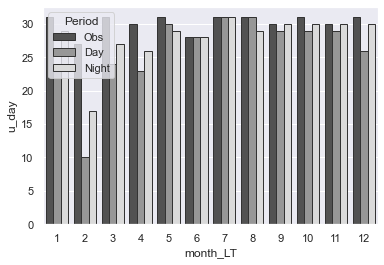

In [12]:
hue_order = ['Obs', 'Day', 'Night']
sns.barplot("month_LT", "u_day", data=df[df['year_LT']==2019], hue='Period',  hue_order=hue_order,  palette='Greys_r', edgecolor=".2")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


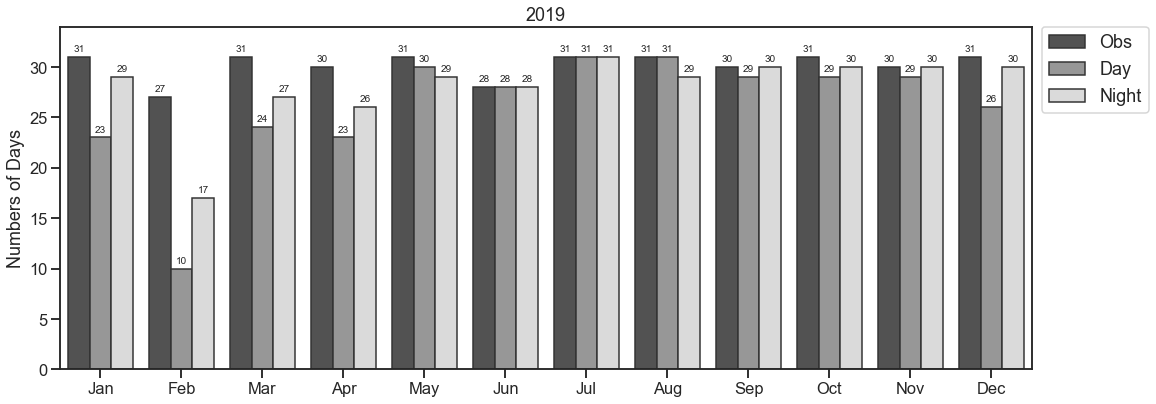

In [13]:
sns.set(font_scale=5)
sns.set_context("talk")
sns.set_style("ticks")


a4_dims = (20, 7)
fig, ax = plt.subplots(figsize=a4_dims)


ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]

hue_order = ['Obs', 'Day', 'Night']
ax = sns.barplot("month_LT", "u_day", data=df[df['year_LT']==2019], hue='Period',  hue_order=hue_order,  palette='Greys_r', edgecolor=".2")

# Iterrating over the bars one-by-one
for bar in ax.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


           
ax.set(xticks = ticks, xticklabels = labels)

#ax.set_yscale("log")
ax.set(ylim=(0, 34))
ax.set(xlabel='',ylabel='Numbers of Days')
plt.title("2019") 
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, prop={'size': 18}, borderaxespad=0.)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gcf().subplots_adjust(bottom=0.2, right=0.8)
output_filename = '02_01_cirrus_stat_2019.png'
plt.savefig(output_filename, dpi=200)



/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


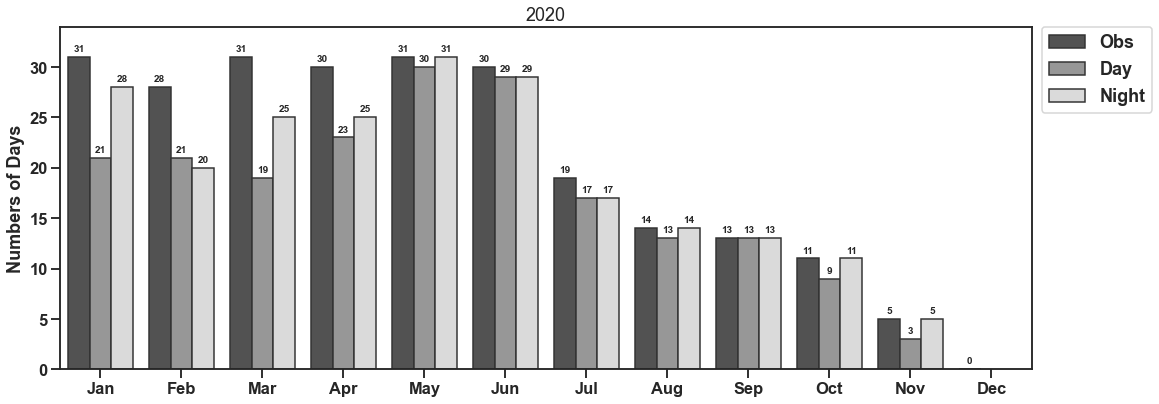

In [14]:
sns.set(font_scale=5)
sns.set_context("talk")
sns.set_style("ticks")


a4_dims = (20, 7)
fig, ax = plt.subplots(figsize=a4_dims)


ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',]

hue_order = ['Obs', 'Day', 'Night']
ax = sns.barplot("month_LT", "u_day", data=df[df['year_LT']==2020], hue='Period',  hue_order=hue_order,  palette='Greys_r', edgecolor=".2")

# Iterrating over the bars one-by-one
for bar in ax.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


           
ax.set(xticks = ticks, xticklabels = labels)

#ax.set_yscale("log")
ax.set(ylim=(0, 34))
ax.set(xlabel='',ylabel='Numbers of Days')
plt.title("2020") 
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, prop={'size': 18}, borderaxespad=0.)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.gcf().subplots_adjust(bottom=0.2, right=0.8)
output_filename = '02_01_cirrus_stat_2020.png'
plt.savefig(output_filename, dpi=200)

